<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1 Real and Pseudo Random Numbers

In [20]:
#A device that provides random numbers is called a random number generator (RNG)

#pseudo RNG == PRNG

#A drawback of PRNG is that once sufficient trials have taken place, there is a higher probability of 
# numbers repeating. However, modern PRNG algorithms are good enough to alleviate this setback.

# Typical PRNG produces uniformly distributed numbers between 0 and 1.


### 1.2 NumPy’s PRNG

In [4]:
#We can make use of numpy to generate random numbers

np.random.rand()  #generates one random number

np.random.rand(10)  #generates 10 random numbers in an array

np.random.rand(5,2) #generates 5 sets, where each sets has 2 random numbers




0.38595036953374307


In [19]:
#The random numbers generated are roughly evenly distributed

#To prove this:

x = np.random.rand(1000)

y = x[x<0.5]

res = len(y) / len(x)

print(res*100)  #Basically we find the ratio of those below 0.5 to the entire set.

#We can also conjecture that the numbers below 0.25 must be 25% and for other values respectively

z = x[x<0.25]

res_2 = len(z) / len(x)

print(res_2)

50.6
0.238


### 1.3 A simple graphical test

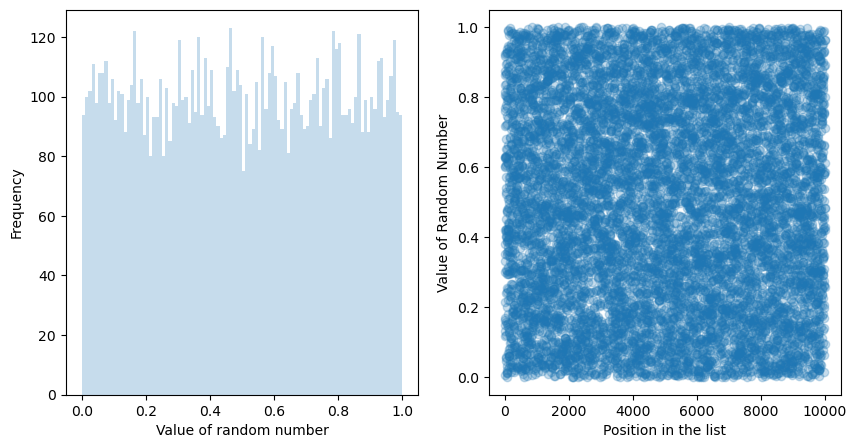

In [22]:
x = np.random.rand(10000)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))

ax[0].hist(x,bins = 100, alpha = .25)
ax[0].set_xlabel('Value of random number')
ax[0].set_ylabel('Frequency')

ax[1].scatter(range(len(x)),x,alpha = 0.25)
ax[1].set_xlabel('Position in the list')
ax[1].set_ylabel('Value of Random Number')

plt.show()

### 1.4 Uniformly beyond \([0,1)\)

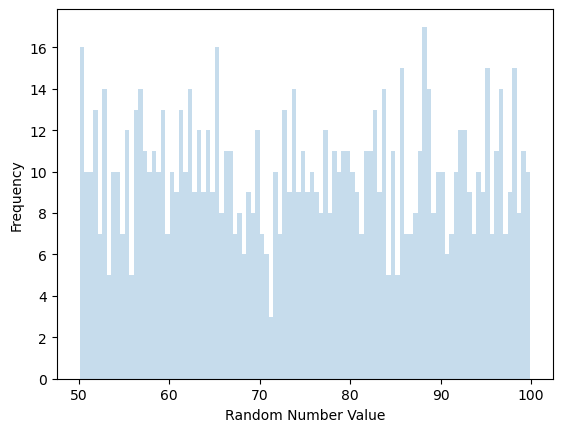

In [28]:
#To generate random numbers beyong the interval of 0,1, use np.random.uniform()

#np.random.uniform(low = <lower limit>, high = <upper limit>, size = <number of numbers you want>)

y = np.random.uniform(low = 50, high = 100,  size =1000)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.hist(y, bins = 100,alpha = .25)
ax.set_xlabel('Random Number Value')
ax.set_ylabel('Frequency')
plt.show()


### 1.5 ‘seeding’ a PRNG

In [34]:
#Seeding helps to generate the same set of Random Numbers
#The seed is basically the integer number that kicks off the algorithm

x_1 = np.random.randint(0,100,10)    #no seed specified

x_2 = np.random.randint(0,100,10)    #no seed specified

np.random.seed(123)
x_3 = np.random.randint(0,100,10)    #the seed = 123 is specified for this sequence

np.random.seed(123)
x_4 = np.random.randint(0,100,10)    #therefore, this will be the consequence

print(x_1)
print(x_2)
print(x_3)
print(x_4)

[73 32 46 96 25 83 78 36 96 80]
[68 49 55 67  2 84 39 66 84 47]
[66 92 98 17 83 57 86 97 96 47]
[66 92 98 17 83 57 86 97 96 47]


In [36]:
Quick_Summary = """
so far, we know how to use
1. np.random.rand          #generate a random number from 0-1
2. np.random.rand(n)       #generate n random numbers from 0-1
3. np.random.rand(n,m)     #generate n sets of m random numbers from 0-1
4. np.random.uniform(low,high,size)  #generates random numbers from low to high
5.np.random.randint(x,y,n)          #generates n integers from x to y
6. np.random.seed(n)             #seeding the sequence of random numbers
"""

## 2 Simulating a Magic-8 Ball

In [38]:
#Given a list, we can use np.random.choice(<list>) to randomly pick an element in the list

#Moreover, we can use np.random.choice(<list>, n) to pick n elements in the list

## 3 Flipping Coins

### 3.1 A fair coin

In [47]:
coin = ['Heads','Tails']

for i in range(5):               #Coin flip results for 5 flips
    x = np.random.choice(coin)
    print(x)

print() #-------------

print(np.random.choice(coin,5))  #Alternative method

Heads
Heads
Tails
Tails
Heads

['Heads' 'Tails' 'Heads' 'Tails' 'Heads']


In [60]:
#We can also define a function, such that heads > 0.5 and tails is any other random number

def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)  #Summing the Trues
    return no_of_heads

print(flip_coins(100))

41


In [61]:
#The upshot of having this function is that we can actually alter it for unfair coin situations

### 3.2 A biased coin

In [62]:
z = flip_coins(100,0.3)  #this function basically gives the number of heads of a biased coin which has a 0.7 probability of obtaining a heads

print(z)

77


### 3.3 A flipping experiment

#### Binomial Distribution

In [74]:
#Suppose we want to figure out the probability of obtaining 7 heads out of 10 flips

#We can basically perform flipping coin experiment with no.of coins = 10, many many times and find out

repetition = 10000

result = [flip_coins(10) for i in range(repetition)]

no_of_heads, head_counts = np.unique(result, return_counts= True)

#Note: no_of_heads --> number of heads per experiment
#      head_counts --> how many times the {no_of_heads} appear in the result

heads_probability = head_counts/repetition


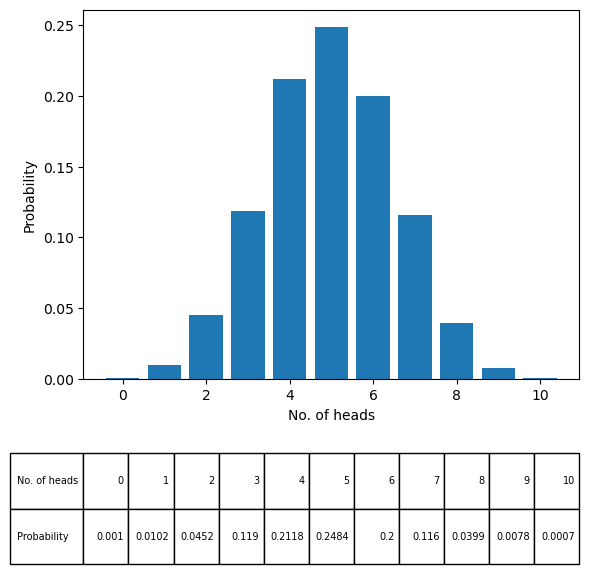

In [82]:
#Now, we can plot our results

plt.bar(no_of_heads, heads_probability)   #This is our pmf
plt.xlabel('No. of heads')
plt.ylabel('Probability')
plt.table([no_of_heads,heads_probability],rowLabels =['No. of heads','Probability'],loc = 'bottom',bbox =[0,-0.5,1,0.3])

plt.show()

In [85]:
#We can make use of scipy

from scipy.stats import binom

x = binom.pmf(k = 7,n = 10,p=.5)

print(x)

#This is the theoretical probability btw

0.11718750000000004


## Exercise 1 :  12C, 13C

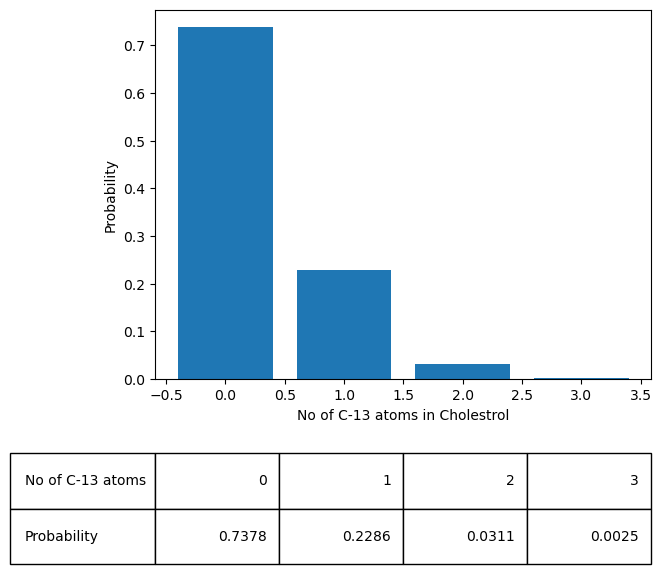

In [151]:
#There are 27 Carbon atoms in Cholestrol

#Each Carbon atom has a 0.9889 probability of being C-12

#We let C-13 be heads and C-12 be tails

repetition = 10000
result = [flip_coins(27,0.9889) for i in range(repetition)]
no_of_heads, head_count = np.unique(result,return_counts = True)
probability_of_head = head_count/repetition

plt.bar(no_of_heads,probability_of_head)
plt.xlabel('No of C-13 atoms in Cholestrol')
plt.ylabel('Probability')
plt.table([no_of_heads,probability_of_head],
          rowLabels=['No of C-13 atoms','Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
plt.show()




In [154]:
mean = (0*0.7378) + (1*0.2286) + (2*0.0311) + (3*0.0025)

variable = np.array([0,1,2,3])
variable = variable**2
variable = variable * [0.7378,0.2286,0.0311,0.0025]

variable = np.sum(variable)

variance = (variable) - (mean**2)
standard_deviation = variance**0.5

print(f' Mean number of C-13 atoms in cholestrol = {mean}')
print(f'Standard Deviation = {standard_deviation}')

 Mean number of C-13 atoms in cholestrol = 0.2983
Standard Deviation = 0.535272930382249


In [155]:
print('The probability that the cholestrol molecule has no carbon atoms is 0.7378, according to the PRNG')

The probability that the cholestrol molecule has no carbon atoms is 0.7378, according to the PRNG
